## Табличное Q-обучение

Одним из наиболее популярных алгоритм обучения на основе временных различий является Q-обучение.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/678cb558a9d59c33ef4810c9618baf34a9577686">

<!-- Раскроем скобки:
$$Q(s,a)\leftarrow (1 - \alpha) \times Q(s,a)+\alpha \times \big (r(s)+\gamma\max_{a'}Q(a',s')\big ).$$ -->

Для обучения будем использовать среду Taxi-v3. Подробнее про данное окружение можно посмотреть в документации: https://gym.openai.com/envs/Taxi-v3/.


In [1]:
try:
    import google.colab
    COLAB = True
except ModuleNotFoundError:
    COLAB = False
    pass

if COLAB:
    !pip -q install "gymnasium[classic-control, atari, accept-rom-license]"
    !pip -q install piglet
    !pip -q install imageio_ffmpeg
    !pip -q install moviepy==1.0.3

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

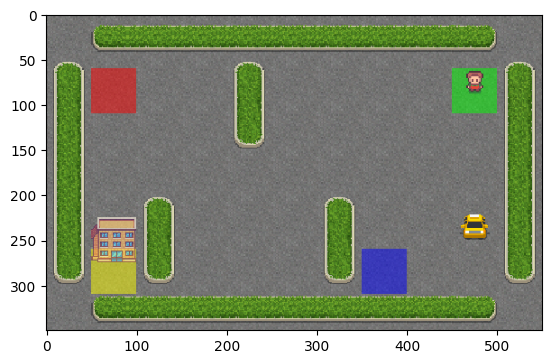

In [4]:
env = gym.make("Taxi-v3", render_mode='rgb_array')
env.reset()
plt.imshow(env.render())

In [5]:
def show_progress(rewards_batch, log):
    """
    Удобная функция, которая отображает прогресс обучения.
    """
    mean_reward = np.mean(rewards_batch)
    log.append(mean_reward)

    clear_output(True)
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(log, label='Mean rewards')
    plt.legend(loc=4)
    plt.show()

### Задание 1

Создайте таблицу из нулей, используя информацию из окружения о количестве состояний и действий


In [6]:
def initialize_q_table(observation_space_n, action_space_n):
    # подсказка смотрим env.observation_space и env.action_space
    # Q = [state][action]
    """<codehere>"""
    Q = np.zeros([observation_space_n, action_space_n])
    """</codehere>"""
    return Q

In [7]:
# Добавить проверку таблицы - размеры, тип.
n_states, n_actions = 3, 5
Q = initialize_q_table(n_states, n_actions)
assert isinstance(Q, np.ndarray) and len(Q.shape) == 2, 'результат должен быть 2D нумпаевским вектором'
assert Q.shape[0] == n_states and Q.shape[1] == n_actions, 'проверь размерности: [N состояний][M действий]'
assert not Q.any(), 'инициализация должна быть нулями'

### Задание 2

Напишите код для epsilon-жадного выбора действия:


In [8]:
def select_action_eps_greedy(Q, state, epsilon):
    # выбираем действие, используя eps-greedy исследование среды:
    # 1) с вероятностью epsilon выбираем случайное действие,
    # 2) иначе выбираем действие жадно
    # action =
    """<codehere>"""
    if epsilon < np.random.random():
        # используем Q-функцию
        action = np.argmax(Q[state])
    else:
        action = np.random.choice(Q.shape[1])
    """</codehere>"""
    return action

Напишите код для формулы Q-обновления:


In [9]:
def update_Q(Q, s, a, r, next_s, alpha, gamma):
    # вычисли V(next_s) - estimate of optimal future value
    # V_ns =
    """<codehere>"""
    V_ns = np.max(Q[next_s,])
    """</codehere>"""

    # посчитай TD ошибку
    # td_error =
    """<codehere>"""

    # Q[s, a] +- = r + V[s_next]
    td_error = r + gamma * V_ns - Q[s, a]
    """</codehere>"""

    # обновление Q-функции
    Q[s, a] += alpha * td_error


Допишите код итерации Q-обучения:


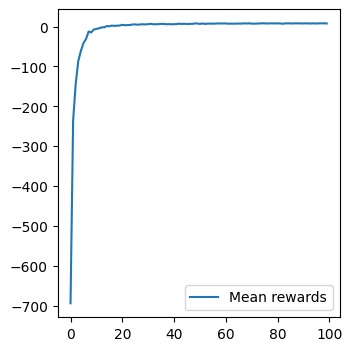

Episode: 10000, Reward: 5, Eps: 0.001246427204280841


In [10]:
# определяем память, в которой будет храниться Q(s,a)
Q = initialize_q_table(env.observation_space.n, env.action_space.n)
log = []
rewards_batch = []

# гиперпараметры алгоритма
alpha = 0.1
gamma = 0.9
epsilon = 0.2
epsilon_decay = 0.95
episodes_number = 10000

for episode in range(1, episodes_number + 1):
    s, _ = env.reset()

    r, episode_reward = 0, 0
    terminated = False

    while not terminated:
        # select action eps-greedy
        # a = ...
        """<codehere>"""
        a = select_action_eps_greedy(Q, s, epsilon)
        """</codehere>"""

        # выполняем действие в среде
        next_s, r, terminated, truncated, _ = env.step(a)

        # Update Q-function
        """<codehere>"""
        update_Q(Q, s, a, r, next_s, alpha, gamma,)
        """</codehere>"""

        s = next_s
        episode_reward += r

    rewards_batch.append(episode_reward)
    if episode % 100 == 0:
        show_progress(rewards_batch, log)
        rewards_batch = []
        print(f"Episode: {episode}, Reward: {episode_reward}, Eps: {epsilon}")
        epsilon *= epsilon_decay

assert log[-1] >= -10

### Интерпретация результатов:

Если все сделано правильно, то график должен выйти на плато около 0. Значение вознаграждение будет в диапазоне [-5, 10], за счет случайного выбора начальной позиции такси и пассажира. Попробуйте изменить гиперпараметры и сравните результаты.


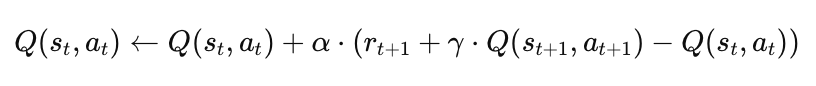


## SARSA

Теперь ради интереса попробуем то же самое, но используя метод SARSA.

Для начала, добавим функцию обновления Q-функции:


In [11]:
def update_Q_SARSA(Q, s, a, r, next_s, alpha, gamma, epsilon):
    # выбери следующее действие eps-greedy
    # next_a =
    """<codehere>"""
    next_a = select_action_eps_greedy(Q, next_s, epsilon)
    """</codehere>"""

    # посчитай TD ошибку
    # td_error =
    """<codehere>"""
    td_error = r + gamma * Q[next_s, next_a] - Q[s, a]
    """</codehere>"""

    # обновление Q-функции
    Q[s, a] += alpha * td_error



Допишите код итерации SARSA-обучения:


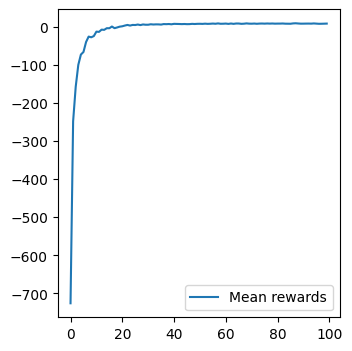

Episode: 10000, Reward: 7, Eps: 0.001246427204280841


In [12]:
# определяем память, в которой будет храниться Q(s,a)
Q = initialize_q_table(env.observation_space.n, env.action_space.n)
log = []
rewards_batch = []

# гиперпараметры алгоритма
alpha = 0.1
gamma = 0.9
epsilon = 0.2
epsilon_decay = 0.95
episodes_number = 10000

for episode in range(1, episodes_number + 1):
    s, _ = env.reset()

    r, episode_reward = 0, 0
    terminated = False

    while not terminated:
        # select action eps-greedy
        # a = ...
        """<codehere>"""
        a = select_action_eps_greedy(Q, s, epsilon)
        """</codehere>"""

        # выполняем действие в среде
        next_s, r, terminated, truncated, info = env.step(a)

        # Update Q-function with SARSA
        """<codehere>"""
        update_Q_SARSA(Q, s, a, r, next_s, alpha, gamma, epsilon)
        """</codehere>"""

        s = next_s
        episode_reward += r

    rewards_batch.append(episode_reward)
    if episode % 100 == 0:

        show_progress(rewards_batch, log)
        rewards_batch = []
        print(f"Episode: {episode}, Reward: {episode_reward}, Eps: {epsilon}")
        epsilon *= epsilon_decay

assert log[-1] >= -10

Сравнивая SARSA и Q-learning, что можно сказать об их кривых обучения? (быстрее-медленнее, обучение стабильнее или нет и тп)
